In [29]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv("Watertypes_data.csv")#, encoding='cp1252')
df

,id,Name,Paper,Water type,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60,ksed (1/h)
0,1,Santa Barbara seawater,Keller,seawater,8.05,37400.0,3133.00,19333.00,377.80,10620.00,398.00,1361.40,10.00,NaN,NaN,0.39800
1,2,artificial seawater,Keller,seawater,7.99,36300.0,2550.00,17667.00,339.80,9726.00,376.00,1225.40,10.00,477.51,1227.25,0.05960
2,3,artificial seawater,Keller,seawater,7.99,36300.0,2550.00,17667.00,339.80,9726.00,376.00,1225.40,50.00,909.19,1950.62,0.20500
3,4,artificial seawater,Keller,seawater,7.99,36300.0,2550.00,17667.00,339.80,9726.00,376.00,1225.40,100.00,886.48,1948.86,0.38300
4,5,artificial seawater,Keller,seawater,7.99,36300.0,2550.00,17667.00,339.80,9726.00,376.00,1225.40,200.00,886.48,1948.86,0.66900
5,6,Bodeg Bay seawater,Keller,seawater,8.08,39300.0,3167.00,19333.00,365.90,10010.00,378.40,1191.00,10.00,NaN,NaN,0.00663
6,7,USCB lagoon,Keller,lagoon,8.90,23733.0,1400.00,1011.00,190.40,5031.00,213.10,581.00,10.00,NaN,NaN,0.20300
7,8,Santa Paula groundwater,Keller,groundwater,7.90,3997.0,1900.00,172.60,14.28,293.70,447.10,224.90,10.00,NaN,NaN,0.23100
8,9,Santa Clara river water,Keller,river water,8.33,4507.0,260.00,125.10,3.11,50.18,110.70,34.08,10.00,NaN,NaN,0.27000
9,10,estero effluent,Keller,treated effluent,7.68,2780.0,306.67,366.70,35.04,377.90,102.70,49.81,10.00,NaN,NaN,0.01550


In [15]:
y = df['ksed (1/h)']

In [16]:
df = df[df.columns[~df.columns.isin(['id', 'Name', 'Paper', 'Water type', 'ksed (1/h)'])]]
print("The df dataframe shape is: ", df.shape)
df.head()

The df dataframe shape is:  (44, 11)


,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60
0,8.05,37400.0,3133.0,19333.0,377.8,10620.0,398.0,1361.4,10.0,NaN,NaN
1,7.99,36300.0,2550.0,17667.0,339.8,9726.0,376.0,1225.4,10.0,477.51,1227.25
2,7.99,36300.0,2550.0,17667.0,339.8,9726.0,376.0,1225.4,50.0,909.19,1950.62
3,7.99,36300.0,2550.0,17667.0,339.8,9726.0,376.0,1225.4,100.0,886.48,1948.86
4,7.99,36300.0,2550.0,17667.0,339.8,9726.0,376.0,1225.4,200.0,886.48,1948.86


In [17]:
corr_mat = df.corr(method='pearson')

<AxesSubplot:>

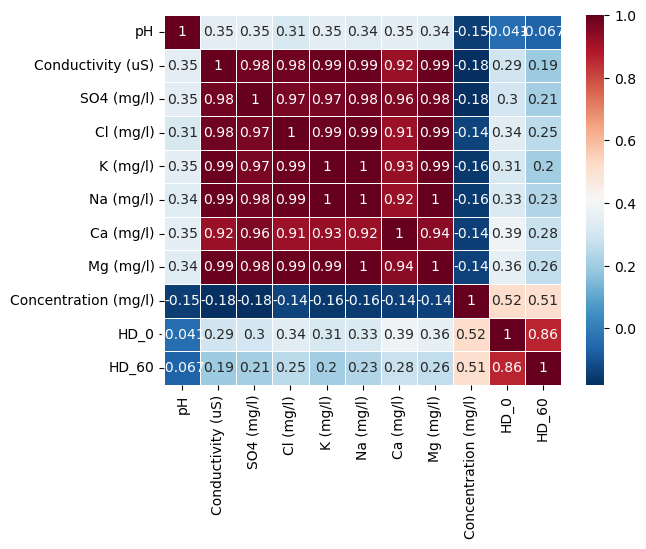

In [18]:
sb.heatmap(corr_mat, 
            xticklabels=corr_mat.columns,
            yticklabels=corr_mat.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [22]:
x = df[['pH', 'Concentration (mg/l)']]
x.head()

,pH,Concentration (mg/l)
0,8.05,10.0
1,7.99,10.0
2,7.99,50.0
3,7.99,100.0
4,7.99,200.0


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

RF = RandomForestRegressor(n_estimators = 10,
                           criterion = 'squared_error') #, random_state=0)

RF.fit(x_train, y_train)

y_train_pred = RF.predict(x_train)
print(f'Train MSE = {mean_squared_error(y_train, y_train_pred)}' )
print(f'Train R^2 = {RF.score(x_train, y_train)}' ) 
y_test_pred = RF.predict(x_test)
print(f'Test MSE = {mean_squared_error(y_test, y_test_pred)}' )
print(f'Test R^2 = {RF.score(x_test, y_test)}' ) 

Train MSE = 0.00219588640625
Train R^2 = 0.7979110434658672
Test MSE = 0.019904450941361115
Test R^2 = 0.5201323998326177


In [47]:
def evaluate(best_candidate, new_candidate):
    print('Overall Best Grid Search Candidate')
    print(f'Train R^2 = {r2_score(y_train, best_candidate.predict(x_train))}')
    print(f'Test R^2 = {r2_score(y_test, best_candidate.predict(x_test))}')
    print('New Grid Search Best Candidate')
    print(f'Train R^2 = {r2_score(y_train, new_candidate.predict(x_train))}')
    print(f'Test R^2 = {r2_score(y_test, new_candidate.predict(x_test))}')

In [76]:
# Tuning of Random Forest parameters with Grid search
param_grid = {'max_depth': [5, 8, 10, 12, 14],
              'min_samples_leaf': [1, 2, 5, 7],
              'min_samples_split': [2, 4, 6, 8]}

RF_grid = RandomForestRegressor(n_estimators = 10, criterion = 'squared_error')#, random_state=0)
grid_search = GridSearchCV(estimator = RF_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)   

grid_search.fit(x_train, y_train)
           
grid_search.best_params_#, grid_search.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'bootstrap': True,
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [77]:
#best_candidate = grid_search.best_estimator_
new_candidate = grid_search.best_estimator_

evaluate(best_candidate, new_candidate)

if r2_score(y_test, new_candidate.predict(x_test)) > r2_score(y_test, best_candidate.predict(x_test))  :
    best_candidate = new_candidate
    best_params = grid_search.best_params_
    print("New best candidate detected")

Overall Best Grid Search Candidate
Train R^2 = 0.8562976101323097
Test R^2 = 0.6666727656175324
New Grid Search Best Candidate
Train R^2 = 0.6253270872783994
Test R^2 = 0.44703686084315075


In [69]:
best_params

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}